## Lorenz System
The Lorenz system may be the most famous example of deterministic chaos and a common entry point to the world of deterministic chaos. It certainly was the first place I learned about this strange world of maths while reading 'Chaos' by James Gleick. 

The infamous story goes like this: The Lorenz system of equations was originally developed as a model for weather patterns. Edward Lorenz was a meteorologist in the early 1960's using this set of equations with one of the earliest digital computers to predict what might happen in a toy model of a weather system. One day he had run this system for a while with a certain set of parameters and starting values. He decided that instead of resetting the system he would start from where he had last left off (one can see his motivation when you recall that computers were not quite what they are today in 1961). He entered a set of values midway through the last sequence into the computer and set it running. 

When Lorenz looked at the output though it didn't make any sense. Even though he had entered the numbers that he had previously seen in the system (and each step was entirely deterministic from the previous one) the values that were being given off for the steps that he had already passed were completely different. At first Lorenz thought there might be an error in the computer introducing randomness where it shouldn't. Later however he realised what had happened. The values that he had entered had come from the computer's printout which used 3 significant figures of accuracy while the computer itself worked to 6 significant figures. 

The tiniest change in the values could lead to completely unpredictable (though entirely deterministic) behaviour for the system.

This story is in fact where the phrase "The Butterfly Effect" comes from. A change, even one as slight as a butterfly flapping it's wings could, according at least to this model, quite literally lead to a hurricane on the other side of the planet. Another reason for the name may be the beautiful plots of this system unfolding (you can see these below) where the different arcs look like the wings of a butterfly.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline

The Lorenz system is made up of three equations relating variable $x$, $y$ & $z$ along with three parameters $\sigma$, $\rho$, and $\beta$. 
- $\frac{dx}{dt} =  \sigma(y - x)$
- $\frac{dy}{dt} = x (\rho - z)-y$
- $\frac{dz}{dt} = x y-\beta z$

These equations come from the way that layer of fluid changes as it is warmed and can be used for that reason to model how air behaves as it moves. Frankly, I was not able to perfectly get the intuition behind the specific paramters and how this relation means they can be used to mode but there is a detailed description on [wikipedia](https://en.wikipedia.org/wiki/Lorenz_system) if you are interested in pursuing that further. The particular parameters that Lorenz was using (and that are used below) were:
- $\sigma = 10$
- $\rho = 28$
- $\beta = \frac{8}{3}$

To get a sense for the kind of thing that is happening with this system we can run it once and trace the paths that are made across an x,y,z plane from the first 100 time steps. This is done below and displayed both as a set of line plot for each of the major axes pairs, as well as in 3d.


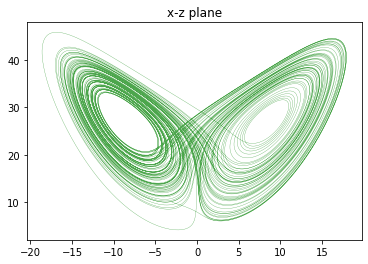

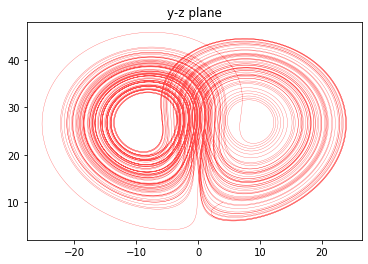

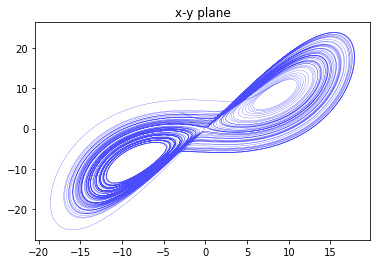

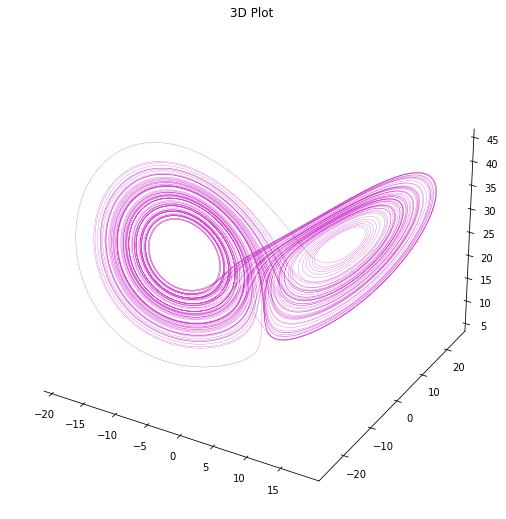

In [11]:
# Define a function to generate the Lorenz System coordinates over a certain time span
def lorenz_system(sigma, rho, beta, dt, time):
    
    #set initial conditions as random ints in rough ranges of behaviour
    x = np.random.randint(-5,5)
    y = np.random.randint(-5,5)
    z = np.random.randint(5,15)
    
    #Create Lists
    x_list = []
    y_list = []
    z_list = []
    
    #Add values for the run
    for steps in range(round(time/dt)):
        # Add values to lists
        x_list.append(x)
        y_list.append(y)
        z_list.append(z)
        
        # Updates Values using Euler Integration
        x = x + ((sigma*(y-x))*dt)
        y = y + ((x*(rho-z)-y)*dt)
        z = z + (((x*y)-(beta*z))*dt)
    
    return x_list, y_list, z_list

# Run the system using the lorenz attractor parameters and save the values
x_values, y_values, z_values = lorenz_system(10, 28, 8/3, 0.001, 100)

#define a function to plot the graph along two axes
def plot_graph(x, y, colour, title):
    plt.plot(x, y, color=colour, alpha=0.7, linewidth=0.3)
    plt.title(title)
    plt.show()
    
def plot_3d_graph(x, y, z, colour, title):
    #Set size of figure
    fig = plt.figure(figsize=(9, 9))
    
    #set axes as 3d projection
    ax = fig.gca(projection='3d')
    
    #Set plane backgrornd colour
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    
    # Hide grid lines
    ax.grid(False)
    
    #plot values
    ax.plot(x, y, z, colour, alpha=0.7, linewidth=0.3)
    ax.set_title(title)
    plt.show()
    
plot_graph(x_values,z_values, 'g', "x-z plane") # Plot the x-z plane
plot_graph(y_values,z_values, 'r', "y-z plane") # Plot the y-z plane
plot_graph(x_values,y_values, 'b', "x-y plane") # Plot the x-y plane
plot_3d_graph(x_values, y_values, z_values, 'm', "3D Plot")

### Acknowledgements
I borrowed from and learned a bunch from these pages as part of putting this notebooks together:
- http://www2.geog.ucl.ac.uk/~mdisney/teaching/GEOGG121/diff/prac/lorenz.py
- https://github.com/gboeing/lorenz-system/blob/master/lorenz-system-attractor-visualize.ipynb
- https://en.wikipedia.org/wiki/Lorenz_system (This is an above average Wikipaedia page)